<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Madhya%20Pradesh/spMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!git clone https://github.com/raishagun/Election-Prediction.git

fatal: destination path 'Election-Prediction' already exists and is not an empty directory.


In [188]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"sp MP"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('sp_mp.csv',index = False)

2020-11-21 23:23:10
1330290688978718730
False
@ArmoredWarlord @Croatsky Yeah but that's still too steep for the SP IMO.

Like I literally don't care about any MP aspect of COD games.
MazderVerhal
United Kingdom
Twitter Web App
0
16
107
0
<--------------------------------------------------->
1
2020-11-21 23:18:20
1330289473578524672
False
@mrdomino_ Same, it just never felt right. TF1 MP with TF2 SP would be the unbeatable GOAT
Matty_Gregoire

Twitter for Android
3
546
567
0
<--------------------------------------------------->
2
2020-11-21 21:30:58
1330262451280076802
False
@DoctorWnba SP is pretty nice
MP is weak
ZM is a 8/10
CODZombieCringe

Twitter for Android
1
269
283
0
<--------------------------------------------------->
3
2020-11-21 18:50:00
1330221946278187009
False
@slakaveli But Slak, how? We got that through sp to mp. The ps5 will have its own gtao, separate from storymode, completely destroying the sp to mp link. 😔
lX_Dr_T4k3r_Xl
Los Santos
Twitter Web App
1
154
146
0
<---

In [189]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       200 non-null    datetime64[ns]
 1   Tweet_id   200 non-null    int64         
 2   Verified   200 non-null    bool          
 3   Tweet      200 non-null    object        
 4   User       200 non-null    object        
 5   Location   200 non-null    object        
 6   Source     200 non-null    object        
 7   Likes      200 non-null    int64         
 8   Followers  200 non-null    int64         
 9   Following  200 non-null    int64         
 10  Retweets   200 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 15.9+ KB


In [191]:
df.shape

(200, 11)

In [192]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [193]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [194]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [195]:
df['Source'].value_counts()

Twitter for Android     73
Twitter Web App         66
Twitter for iPhone      37
Mailchimp                9
TweetDeck                5
Twitter for iPad         3
Buffer                   2
twittbot.net             1
IFTTT                    1
SocialPilot.co           1
Flamingo for Android     1
Politwoops               1
Name: Source, dtype: int64

In [196]:
df['Location'].nunique()

111

In [197]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

200

In [198]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


200

In [199]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [200]:
df['Tweet'].duplicated().sum()

0

In [201]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(200, 11)

In [202]:
df['Tweet'].duplicated().sum()

0

In [203]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [204]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [205]:
df.shape

(200, 12)

In [206]:
df['Processed_Tweet']

0      @ArmoredWarlord @Croatsky Yeah but that's stil...
1      @mrdomino_ Same, it just never felt right. TF1...
2      @DoctorWnba SP is pretty nice\nMP is weak\nZM ...
3      @slakaveli But Slak, how? We got that through ...
4      I think Nicola must be one of the most unique ...
                             ...                        
195    @mukeshmarda @rkmarar9 @judedavid21 In UP let ...
196    @saptagiriulaka hope you have seen the video ....
197    @ClunkSpider @deathloop @ArkaneStudios Or both...
198    @Treyarch Playing on Xbox One X W/ mouse and k...
199    @ben_a_williams_ No this game crashes far more...
Name: Processed_Tweet, Length: 200, dtype: object

In [207]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0      @ArmoredWarlord @Croatsky Yeah but that's stil...
1      @mrdomino_ Same, it just never felt right. TF1...
2      @DoctorWnba SP is pretty nice\nMP is weak\nZM ...
3      @slakaveli But Slak, how? We got that through ...
4      I think Nicola must be one of the most unique ...
                             ...                        
195    @mukeshmarda @rkmarar9 @judedavid21 In UP let ...
196    @saptagiriulaka hope you have seen the video ....
197    @ClunkSpider @deathloop @ArkaneStudios Or both...
198    @Treyarch Playing on Xbox One X W/ mouse and k...
199    @ben_a_williams_ No this game crashes far more...
Name: Processed_Tweet, Length: 200, dtype: object

In [208]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0          Yeah but that's still too steep for the SP...
1        Same, it just never felt right. TF1 MP with ...
2            SP is pretty nice\nMP is weak\nZM is a 8/10
3        But Slak, how? We got that through sp to mp....
4      I think Nicola must be one of the most unique ...
                             ...                        
195          In UP let SP fight alone and let some Co...
196      hope you have seen the video . As the local ...
197          Or both sp and mp, not sure. \nBut its a...
198      Playing on Xbox One X W/ mouse and keyboard....
199      No this game crashes far more then BO4. I cr...
Name: Processed_Tweet, Length: 200, dtype: object

In [209]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0          Yeah but that's still too steep for the SP...
1        Same, it just never felt right. TF1 MP with ...
2            SP is pretty nice\nMP is weak\nZM is a 8/10
3        But Slak, how? We got that through sp to mp....
4      I think Nicola must be one of the most unique ...
                             ...                        
195          In UP let SP fight alone and let some Co...
196      hope you have seen the video . As the local ...
197          Or both sp and mp, not sure. \nBut its a...
198      Playing on Xbox One X W/ mouse and keyboard....
199      No this game crashes far more then BO4. I cr...
Name: Processed_Tweet, Length: 200, dtype: object

In [210]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0          Yeah but that's still too steep for the SP...
1        Same, it just never felt right. TF1 MP with ...
2            SP is pretty nice\nMP is weak\nZM is a 8/10
3        But Slak, how? We got that through sp to mp....
4      I think Nicola must be one of the most unique ...
                             ...                        
195          In UP let SP fight alone and let some Co...
196      hope you have seen the video . As the local ...
197          Or both sp and mp, not sure. \nBut its a...
198      Playing on Xbox One X W/ mouse and keyboard....
199      No this game crashes far more then BO4. I cr...
Name: Processed_Tweet, Length: 200, dtype: object

In [211]:
!pip install tweet-preprocessor

In [212]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0      Yeah but that's still too steep for the SP IMO...
1      Same, it just never felt right. TF1 MP with TF...
2                 SP is pretty niceMP is weakZM is a /10
3      But Slak, how? We got that through sp to mp. T...
4      I think Nicola must be one of the most unique ...
                             ...                        
195    In UP let SP fight alone and let some Congress...
196    hope you have seen the video . As the local MP...
197    Or both sp and mp, not sure. But its a multipl...
198    Playing on Xbox One X W/ mouse and keyboard. G...
199    No this game crashes far more then BO4. I cras...
Name: Processed_Tweet, Length: 200, dtype: object

In [213]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0      Yeah but that s still too steep for the SP IMO...
1      Same  it just never felt right  TF  MP with TF...
2                 SP is pretty niceMP is weakZM is a    
3      But Slak  how  We got that through sp to mp  T...
4      I think Nicola must be one of the most unique ...
                             ...                        
195    In UP let SP fight alone and let some Congress...
196    hope you have seen the video   As the local MP...
197    Or both sp and mp  not sure  But its a multipl...
198    Playing on Xbox One X W  mouse and keyboard  G...
199    No this game crashes far more then BO   I cras...
Name: Processed_Tweet, Length: 200, dtype: object

In [214]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0      yeah but that s still too steep for the sp imo...
1      same  it just never felt right  tf  mp with tf...
2                 sp is pretty nicemp is weakzm is a    
3      but slak  how  we got that through sp to mp  t...
4      i think nicola must be one of the most unique ...
                             ...                        
195    in up let sp fight alone and let some congress...
196    hope you have seen the video   as the local mp...
197    or both sp and mp  not sure  but its a multipl...
198    playing on xbox one x w  mouse and keyboard  g...
199    no this game crashes far more then bo   i cras...
Name: Processed_Tweet, Length: 200, dtype: object

In [215]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'give your cat some time to play it might have the next sp to mp glitch'

In [216]:
df['User'].value_counts()

leadlagreport      4
mpmsandman         3
K__Med             3
Umesh_Desai        3
4lFRj9Vt1Y3iPKv    3
                  ..
WindyCityGaming    1
boersc             1
RileyTaugor        1
So12rovv           1
Dunny9515          1
Name: User, Length: 179, dtype: int64

In [217]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


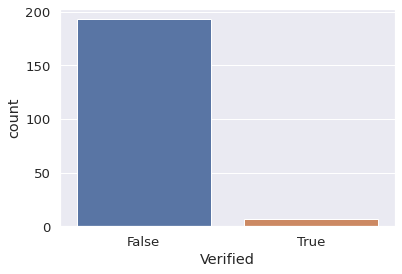

In [218]:
bar = sns.countplot(df['Verified'])

In [219]:
df['Verified'].value_counts()

False    193
True       7
Name: Verified, dtype: int64

In [220]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

leadlagreport    4
TimesNow         1
jdhankhar1       1
josemorgado      1
Name: User, dtype: int64

In [221]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 9, 16: 24, 17: 25, 18: 32, 19: 46, 20: 41, 21: 23})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

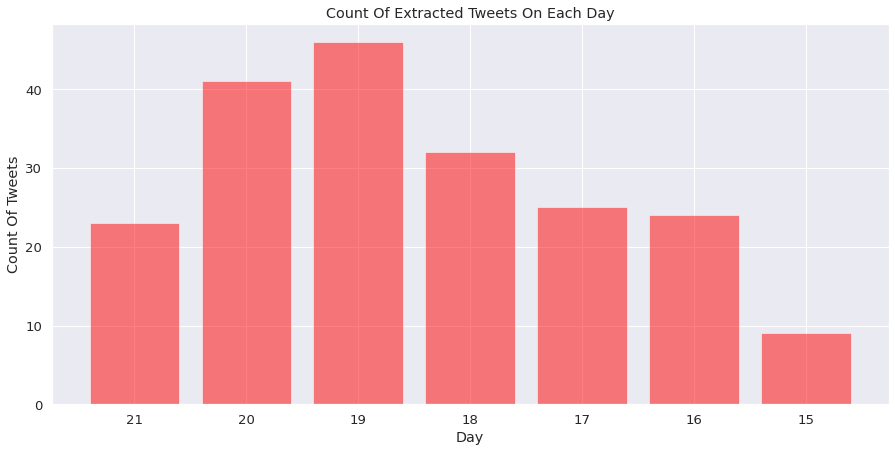

In [222]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [223]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({1: 8,
         2: 10,
         3: 6,
         4: 9,
         5: 5,
         6: 4,
         7: 7,
         8: 2,
         9: 2,
         10: 8,
         11: 11,
         12: 6,
         13: 15,
         14: 9,
         15: 9,
         16: 19,
         17: 20,
         18: 7,
         19: 9,
         20: 5,
         21: 9,
         22: 12,
         23: 8})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

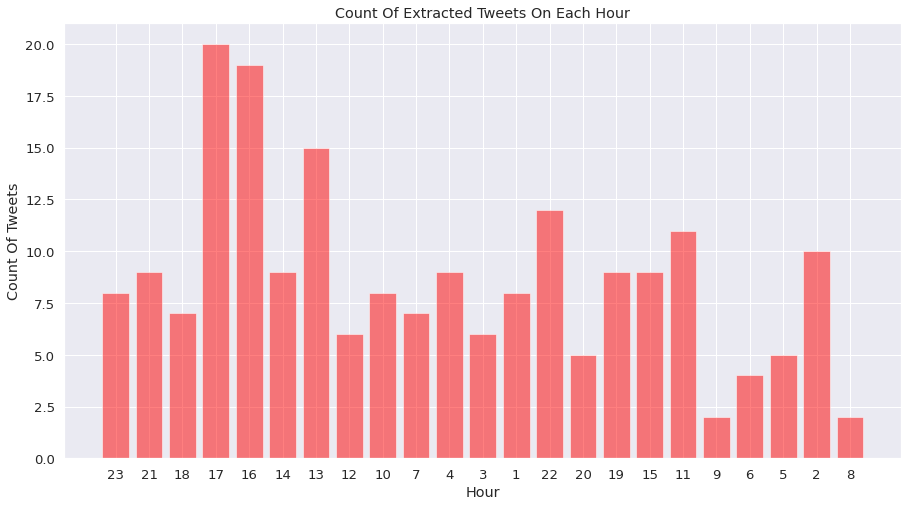

In [224]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [225]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [226]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [227]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

["hasn't", "should've", 'was', 'aren', 'than', "wouldn't", 'of', 'over', 'out', 'are', 'some', 'above', 'been', "aren't", 'be', 'so', 'yours', "shan't", 'o', 'then', 's', 'now', "won't", 'me', 'its', 'any', 'my', 'for', 'doing', "you've", 'just', 'did', 'before', "hadn't", 'the', 'other', 'while', 'further', 'we', 'a', 'himself', 'too', "mustn't", 'their', 'needn', 'how', 'had', 'here', 'which', "weren't", "that'll", 'these', 'whom', 'i', 'couldn', 'can', 'each', 'only', 'has', 'if', 've', 'wasn', 'most', 'yourself', 'during', 'who', 'does', 'not', 'don', 'ain', 'it', 'd', 'haven', "wasn't", 'below', "doesn't", 'down', 'wouldn', "you're", 'what', 'being', 'an', 'on', 'where', 'hers', 'into', 'his', 'them', 't', 'when', 'ma', 'from', 'once', 'with', 'weren', "haven't", 'ours', "isn't", 'again', 'didn', 'off', 'to', 'few', 'isn', 'nor', 'between', 'as', 'she', 'those', 'were', 'at', 'hadn', 'own', 'and', 'is', 'yourselves', 'themselves', 're', 'myself', 'until', 'he', 'after', 'shan', 's

In [228]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0      yeah still steep sp imo like literally care mp...
1      never felt right tf mp tf sp would unbeatable ...
2                                sp pretty nicemp weakzm
3      slak got sp mp ps gtao separate storymode comp...
4      think nicola must one unique leaders indy move...
                             ...                        
195    let sp fight alone let congress leaders fight ...
196    hope seen video local mp kindly take matter sp...
197                     sp mp sure multiplayer game sure
198    playing xbox one x w mouse keyboard game freez...
199    game crashes far bo crashed time zombies bo co...
Name: Processed_Tweet, Length: 200, dtype: object

In [229]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0      [yeah, still, steep, sp, imo, like, literally,...
1      [never, felt, right, tf, mp, tf, sp, would, un...
2                           [sp, pretty, nicemp, weakzm]
3      [slak, got, sp, mp, ps, gtao, separate, storym...
4      [think, nicola, must, one, unique, leaders, in...
                             ...                        
195    [let, sp, fight, alone, let, congress, leaders...
196    [hope, seen, video, local, mp, kindly, take, m...
197              [sp, mp, sure, multiplayer, game, sure]
198    [playing, xbox, one, x, w, mouse, keyboard, ga...
199    [game, crashes, far, bo, crashed, time, zombie...
Name: Processed_Tweet, Length: 200, dtype: object

In [230]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0      [yeah, still, steep, sp, imo, like, liter, car...
1      [never, felt, right, tf, mp, tf, sp, would, un...
2                           [sp, pretti, nicemp, weakzm]
3      [slak, got, sp, mp, ps, gtao, separ, storymod,...
4      [think, nicola, must, one, uniqu, leader, indi...
                             ...                        
195    [let, sp, fight, alon, let, congress, leader, ...
196    [hope, seen, video, local, mp, kindli, take, m...
197                [sp, mp, sure, multiplay, game, sure]
198    [play, xbox, one, x, w, mous, keyboard, game, ...
199    [game, crash, far, bo, crash, time, zombi, bo,...
Name: Processed_Tweet, Length: 200, dtype: object

In [231]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 23:23:10,1330290688978718730,False,@ArmoredWarlord @Croatsky Yeah but that's stil...,MazderVerhal,United Kingdom,Twitter Web App,0,16,107,0,"[yeah, still, steep, imo, like, liter, care, a..."
1,2020-11-21 23:18:20,1330289473578524672,False,"@mrdomino_ Same, it just never felt right. TF1...",Matty_Gregoire,,Twitter for Android,3,546,567,0,"[never, felt, right, would, unbeat, goat]"
2,2020-11-21 21:30:58,1330262451280076802,False,@DoctorWnba SP is pretty nice\nMP is weak\nZM ...,CODZombieCringe,,Twitter for Android,1,269,283,0,"[pretti, nicemp, weakzm]"
3,2020-11-21 18:50:00,1330221946278187009,False,"@slakaveli But Slak, how? We got that through ...",lX_Dr_T4k3r_Xl,Los Santos,Twitter Web App,1,154,146,0,"[slak, got, gtao, separ, storymod, complet, de..."
4,2020-11-21 17:18:13,1330198846136324096,False,I think Nicola must be one of the most unique ...,ga11acher,,Twitter Web App,20,3844,3160,2,"[think, nicola, must, one, uniqu, leader, indi..."
...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-11-15 17:22:55,1328025700276740097,False,@mukeshmarda @rkmarar9 @judedavid21 In UP let ...,softsto38135836,Shillong,Twitter for Android,3,252,602,2,"[let, fight, alon, let, congress, leader, figh..."
196,2020-11-15 16:00:36,1328004986203119616,False,@saptagiriulaka hope you have seen the video ....,indian_2030,Twitter,Twitter for Android,1,209,507,0,"[hope, seen, video, local, kindli, take, matte..."
197,2020-11-15 14:20:15,1327979730881003521,False,@ClunkSpider @deathloop @ArkaneStudios Or both...,ayushkalia23,"Ludhiana, India",Twitter for Android,0,385,461,0,"[sure, multiplay, game, sure]"
198,2020-11-15 13:45:32,1327970994733031429,False,@Treyarch Playing on Xbox One X W/ mouse and k...,cody_vaughan,,Twitter for Android,0,26,35,0,"[play, xbox, one, mous, keyboard, game, freez,..."


In [232]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

2810

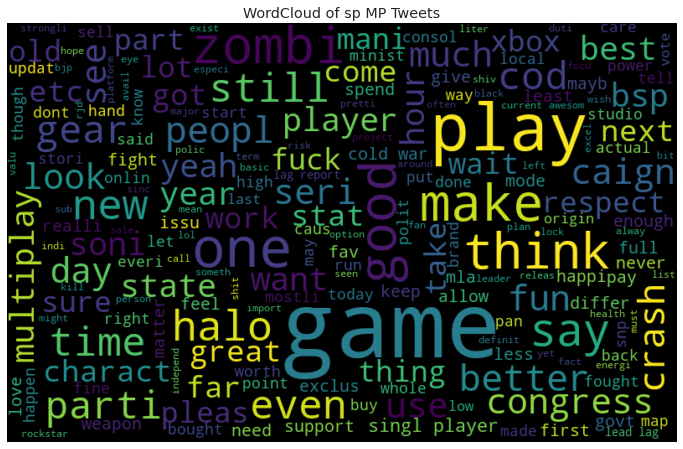

In [234]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of sp MP Tweets")
plt.show()

In [235]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

200

In [236]:
len(text)

2810

In [237]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 76
Negative Tweets: 66
Neutral Tweets 58


In [238]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [239]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

In [240]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.000,0.470,0.530,0.7845
1,0.000,1.000,0.000,0.0000
2,0.000,1.000,0.000,0.0000
3,0.333,0.667,0.000,-0.5423
4,0.123,0.877,0.000,-0.5423
...,...,...,...,...
195,0.292,0.562,0.146,-0.6369
196,0.000,0.599,0.401,0.6908
197,0.000,0.303,0.697,0.5574
198,0.120,0.812,0.067,-0.2263


In [241]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.000,0.470,0.53,0.7845,Positive
1,0.000,1.000,0.00,0.0000,Neutral
2,0.000,1.000,0.00,0.0000,Neutral
3,0.333,0.667,0.00,-0.5423,Negative
4,0.123,0.877,0.00,-0.5423,Negative


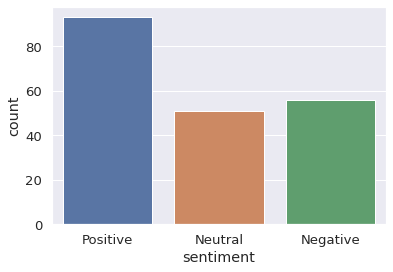

In [242]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [243]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Madhya Pradesh/sp_mp.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

354

In [244]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [245]:
word_emotion=dict()
for i in range(0,354):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [60]:
from numpy import nan
nan == nan


False

In [ ]:
for i in range(0,155):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [ ]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

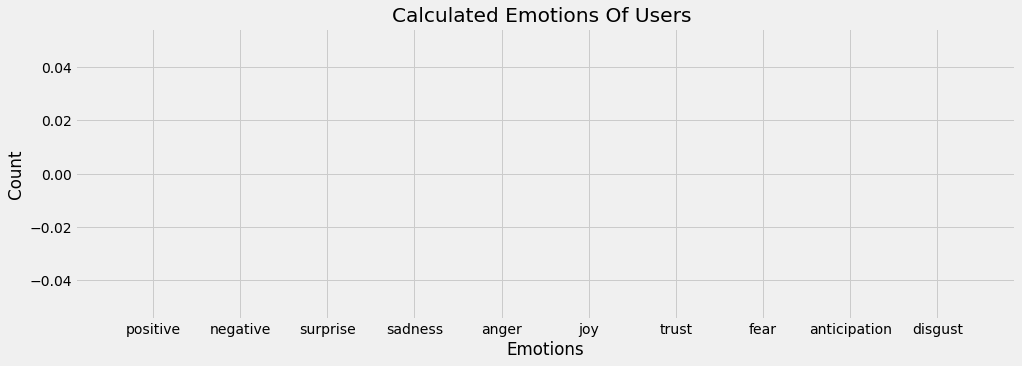

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [ ]:
df.Location  = df.Location.fillna('INDIA')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [ ]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                    1357
India                317
Hyderabad, India      86
Mumbai, India         78
New Delhi, India      77
                    ... 
DC/Cape Town           1
भारत                   1
Hell, MI               1
Puri, India            1
Why?                   1
Name: Location, Length: 931, dtype: int64

In [ ]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 23:36:37,1330294072947437568,False,#BJP &amp; #AIADMK tie-up to continue for 2021...,vipulananda,"Colombo, Sri Lanka",Twitter for iPhone,0,2973,5001,0,"[bjp, aiadmk, tie, continu, tamil, nadu, poll]",Colombo
1,2020-11-21 23:33:21,1330293250847088646,False,@my_prema @MyNameIsSenthil @King_Of_Lanka @New...,Meyy_Chennai,"Chennai, India",Twitter for Android,1,143,343,1,"[proof, singl, case, till, date, corrupt, guy,...",Chennai
2,2020-11-21 23:28:15,1330291967260057608,False,The ground worker in fact is in unenviable pos...,mainkaunhoon_,,Twitter Web App,0,41,5,0,"[ground, worker, fact, unenvi, posit, sibal, s...",
3,2020-11-21 23:25:43,1330291330124312590,False,"@KTRTRS @KTRTRS Sir, just ask BJP MP #KishanRe...",Hyderabadmpost,Hyderabad,FS Poster,0,38,236,0,"[sir, ask, bjp, kishanreddi, secunderabad, use...",Hyderabad
4,2020-11-21 23:19:03,1330289654227218438,False,#winner #Manipur Power through knowledge site:...,FutureWorldCen,UK,Tweet Suite,0,3685,4791,0,"[winner, manipur, power, knowledg, site, local...",UK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,2020-11-15 12:03:45,1327945380315549696,False,Something good coming up in your way Sushil Mo...,pallzie,India,Twitter for Android,4,188,57,0,"[someth, good, come, way, sushil, modi, deputi...",India
3694,2020-11-15 11:56:22,1327943523212038147,False,@Mr_Siddharth There is a predictable sickening...,S_K_Raman,India,Twitter for iPhone,0,441,666,0,"[predict, sicken, chain, event, anti, hindu, e...",India
3695,2020-11-15 11:56:20,1327943515343527938,False,@BJP4India @bandisanjay_bjp @JPNadda @byadavbj...,KalakotaAbhine1,"Hyderabad, India",Twitter for Android,0,23,48,0,"[sir, pleas, help, back, work, help, famili, d...",Hyderabad
3696,2020-11-15 11:55:46,1327943372183461891,False,Talks were on that BJP will go for the UP mode...,Saysniha,भारत गणराज्य,Twitter for iPhone,4,965,291,0,"[talk, bjp, model, toh, hai, chatukaar, tere, ...",भारत गणराज्य


In [246]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [247]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,sentiment,day
0,2020-11-21 23:23:10,1330290688978718730,False,@ArmoredWarlord @Croatsky Yeah but that's stil...,MazderVerhal,United Kingdom,Twitter Web App,0,16,107,0,"[yeah, still, steep, imo, like, liter, care, a...",Positive,21
1,2020-11-21 23:18:20,1330289473578524672,False,"@mrdomino_ Same, it just never felt right. TF1...",Matty_Gregoire,,Twitter for Android,3,546,567,0,"[never, felt, right, would, unbeat, goat]",Neutral,21
2,2020-11-21 21:30:58,1330262451280076802,False,@DoctorWnba SP is pretty nice\nMP is weak\nZM ...,CODZombieCringe,,Twitter for Android,1,269,283,0,"[pretti, nicemp, weakzm]",Neutral,21
3,2020-11-21 18:50:00,1330221946278187009,False,"@slakaveli But Slak, how? We got that through ...",lX_Dr_T4k3r_Xl,Los Santos,Twitter Web App,1,154,146,0,"[slak, got, gtao, separ, storymod, complet, de...",Negative,21
4,2020-11-21 17:18:13,1330198846136324096,False,I think Nicola must be one of the most unique ...,ga11acher,,Twitter Web App,20,3844,3160,2,"[think, nicola, must, one, uniqu, leader, indi...",Negative,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


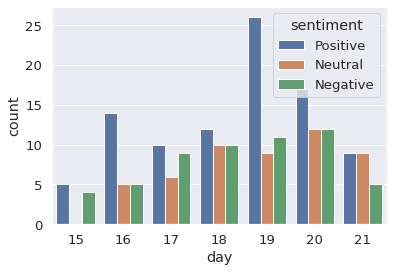

In [248]:
sns.countplot(df['day'],hue = df['sentiment'])

In [249]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [250]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,sentiment,day,sentiment_1
0,2020-11-21 23:23:10,1330290688978718730,False,@ArmoredWarlord @Croatsky Yeah but that's stil...,MazderVerhal,United Kingdom,Twitter Web App,0,16,107,0,"[yeah, still, steep, imo, like, liter, care, a...",Positive,21,2
1,2020-11-21 23:18:20,1330289473578524672,False,"@mrdomino_ Same, it just never felt right. TF1...",Matty_Gregoire,,Twitter for Android,3,546,567,0,"[never, felt, right, would, unbeat, goat]",Neutral,21,1
2,2020-11-21 21:30:58,1330262451280076802,False,@DoctorWnba SP is pretty nice\nMP is weak\nZM ...,CODZombieCringe,,Twitter for Android,1,269,283,0,"[pretti, nicemp, weakzm]",Neutral,21,1
3,2020-11-21 18:50:00,1330221946278187009,False,"@slakaveli But Slak, how? We got that through ...",lX_Dr_T4k3r_Xl,Los Santos,Twitter Web App,1,154,146,0,"[slak, got, gtao, separ, storymod, complet, de...",Negative,21,0
4,2020-11-21 17:18:13,1330198846136324096,False,I think Nicola must be one of the most unique ...,ga11acher,,Twitter Web App,20,3844,3160,2,"[think, nicola, must, one, uniqu, leader, indi...",Negative,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2020-11-15 17:22:55,1328025700276740097,False,@mukeshmarda @rkmarar9 @judedavid21 In UP let ...,softsto38135836,Shillong,Twitter for Android,3,252,602,2,"[let, fight, alon, let, congress, leader, figh...",Negative,15,0
196,2020-11-15 16:00:36,1328004986203119616,False,@saptagiriulaka hope you have seen the video ....,indian_2030,Twitter,Twitter for Android,1,209,507,0,"[hope, seen, video, local, kindli, take, matte...",Positive,15,2
197,2020-11-15 14:20:15,1327979730881003521,False,@ClunkSpider @deathloop @ArkaneStudios Or both...,ayushkalia23,"Ludhiana, India",Twitter for Android,0,385,461,0,"[sure, multiplay, game, sure]",Positive,15,2
198,2020-11-15 13:45:32,1327970994733031429,False,@Treyarch Playing on Xbox One X W/ mouse and k...,cody_vaughan,,Twitter for Android,0,26,35,0,"[play, xbox, one, mous, keyboard, game, freez,...",Negative,15,0


In [251]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [253]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [254]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [255]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.38333333333333336
Precision Score:  0.38333333333333336
Recall Score:  0.38333333333333336
F1 Score:  0.38333333333333336


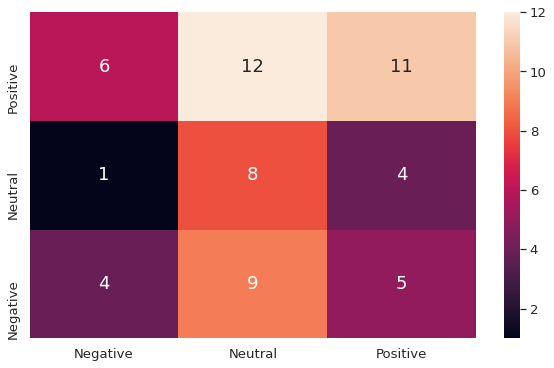

In [256]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [257]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [258]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [259]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.5142857142857143
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 8, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [260]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.4166666666666667
Precision Score:  0.4166666666666667
Recall Score:  0.4166666666666667
F1 Score:  0.4166666666666667


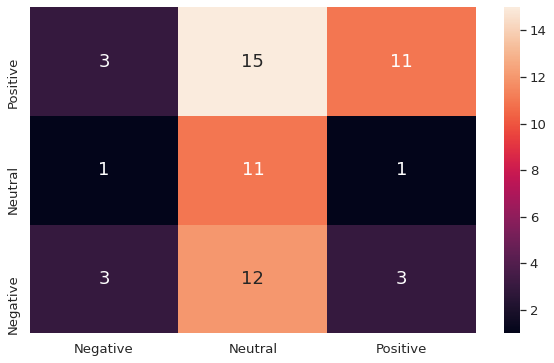

In [261]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [262]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [263]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.5166666666666667
Precision Score:  0.5166666666666667
Recall Score:  0.5166666666666667
F1 Score:  0.5166666666666667


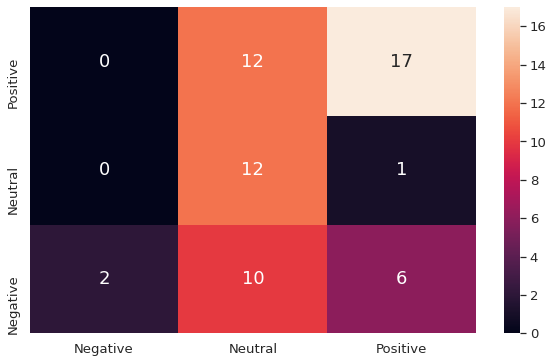

In [264]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [265]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [266]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, max_depth=10, criterion=gini ..................
[CV]  n_estimators=100, max_depth=10, criterion=gini, score=0.429, total=   0.2s
[CV] n_estimators=100, max_depth=10, criterion=gini ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=100, max_depth=10, criterion=gini, score=0.536, total=   0.2s
[CV] n_estimators=100, max_depth=10, criterion=gini ..................
[CV]  n_estimators=100, max_depth=10, criterion=gini, score=0.464, total=   0.1s
[CV] n_estimators=100, max_depth=10, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=100, max_depth=10, criterion=gini, score=0.500, total=   0.2s
[CV] n_estimators=100, max_depth=10, criterion=gini ..................
[CV]  n_estimators=100, max_depth=10, criterion=gini, score=0.500, total=   0.1s
[CV] n_estimators=500, max_depth=19, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=500, max_depth=19, criterion=entropy, score=0.643, total=   0.8s
[CV] n_estimators=500, max_depth=19, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=500, max_depth=19, criterion=entropy, score=0.464, total=   0.8s
[CV] n_estimators=500, max_depth=19, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.4s remaining:    0.0s


[CV]  n_estimators=500, max_depth=19, criterion=entropy, score=0.429, total=   0.8s
[CV] n_estimators=500, max_depth=19, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=500, max_depth=19, criterion=entropy, score=0.643, total=   0.8s
[CV] n_estimators=500, max_depth=19, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.0s remaining:    0.0s


[CV]  n_estimators=500, max_depth=19, criterion=entropy, score=0.500, total=   0.8s
[CV] n_estimators=200, max_depth=12, criterion=entropy ...............
[CV]  n_estimators=200, max_depth=12, criterion=entropy, score=0.429, total=   0.3s
[CV] n_estimators=200, max_depth=12, criterion=entropy ...............
[CV]  n_estimators=200, max_depth=12, criterion=entropy, score=0.536, total=   0.3s
[CV] n_estimators=200, max_depth=12, criterion=entropy ...............
[CV]  n_estimators=200, max_depth=12, criterion=entropy, score=0.464, total=   0.3s
[CV] n_estimators=200, max_depth=12, criterion=entropy ...............
[CV]  n_estimators=200, max_depth=12, criterion=entropy, score=0.500, total=   0.3s
[CV] n_estimators=200, max_depth=12, criterion=entropy ...............
[CV]  n_estimators=200, max_depth=12, criterion=entropy, score=0.500, total=   0.3s
[CV] n_estimators=200, max_depth=10, criterion=entropy ...............
[CV]  n_estimators=200, max_depth=10, criterion=entropy, score=0.429, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   38.9s finished


0.5357142857142858
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 19, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [267]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.5666666666666667
Precision Score:  0.5666666666666667
Recall Score:  0.5666666666666667
F1 Score:  0.5666666666666667


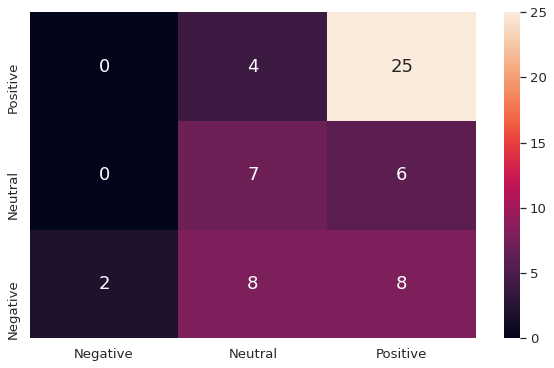

In [268]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [269]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.6333333333333333
Precision Score:  0.6333333333333333
Recall Score:  0.6333333333333333
F1 Score:  0.6333333333333333


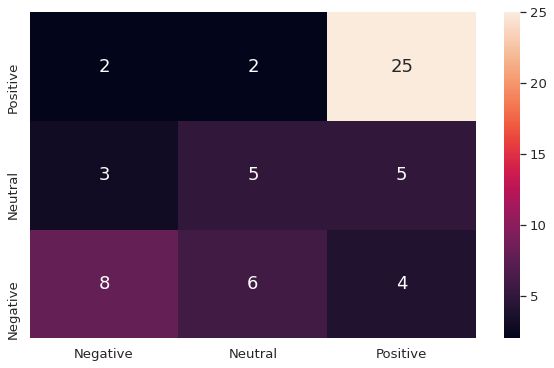

In [270]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [271]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [272]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.5928571428571429
{'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [273]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.6333333333333333
Precision Score:  0.6333333333333333
Recall Score:  0.6333333333333333
F1 Score:  0.6333333333333333


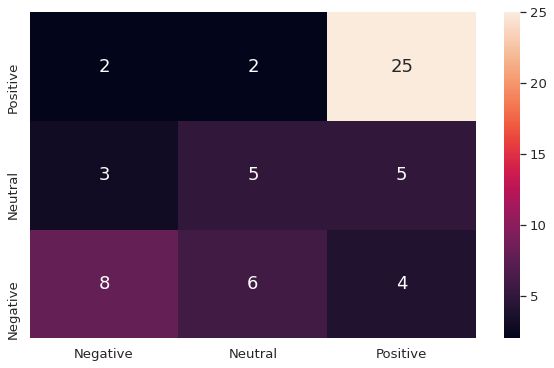

In [274]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

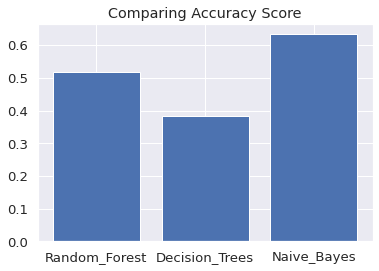

In [275]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

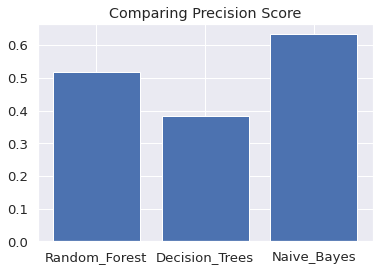

In [276]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

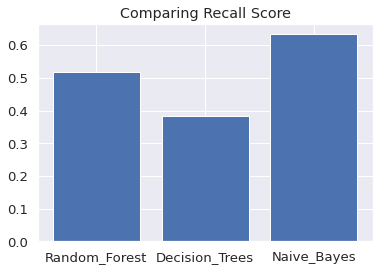

In [277]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

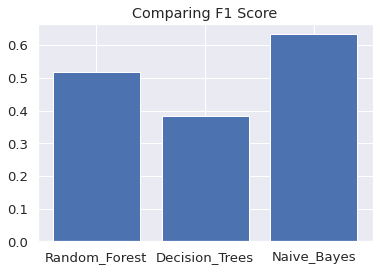

In [278]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()